
Estimators

        Desirable properties: unbiased and efficient
        Examples: mean, conditional means

Linear regression

        Linear regression estimates the slopes and intercepts of the population regression line
        Measures the linear relationship between explanitory variables and a response variable
        The slope of the population regression line is the expected effect on Y of a unit change in X        

The general linear model can be expressed as,

$$y_i = \beta_0 + \beta_1 x_i + \mu_i, i=1...n$$

* y is the dependent variable
* x is the independent variable
* The $b_0$ = intercept
* $b_1$ = slope
* $mu_i$ = the regression residual or error term

Ordinary Least Squares (OLS)
    
* An estimator that estimates the conditioanl means of the population parameters
* Minimizes the average squared difference between the actual values of y and the estmated lines predicted values

Consider $winpercent_i = \beta_0 + \beta_1 firstgoal_i + \mu_i, i=1...n$    

* unit of observation is the a season-team for $i=1...30$
* $winpercent_i$: a team season-level winning percentage
* $firstgoal_i$: the proportion of total season games the team scored first
* The intercept, $b_0$, (taken literally) is the estimated number of season wins if the team had 0 first goal games (i.e., $x=0$)
* The paramater, $b_1$, is the esimated change in a team's winning percentage for each 1 point increase in the proportion of fist goal games

Specification

* Continuous variables: parameter estimates are slope effects
* Categorical data represented as a series of indicator variables (i.e. fixed effects): parameter estimates are shift effects relative to the intercept/constant
* Binary (1/0) dependent variables are linear probability models
* Generally obtain unbiased slope effects
* Potentially predict outside the 0-1 interval

Examine the impact of physical characteristics on winning

In [163]:
%matplotlib inline
import os
import sys
import numpy 
import pandas 
import matplotlib.pyplot as plt
import pylab

# imports regression library
# OLS: ordinary least squares (estimation technique used to estimate the linear regression model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

from decimal import getcontext, Decimal
# Set the precision.
getcontext().prec = 3

In [164]:
dm = pandas.read_csv('2010game_physical.csv')

In [165]:
dm.columns.tolist()
len(dm)
dm.head()
dm.tail()
dm.describe()
dm.dtypes

gamenumber       int64
awayTeam        object
awaySalary     float64
awayAge          int64
awayHeight       int64
awayWeight       int64
awayGoaliue     object
awayGoals        int64
homeTeam        object
homeSalary     float64
homeAge          int64
homeHeight       int64
homeWeight       int64
homeGoalie      object
homeGoals        int64
winteamcode     object
dtype: object

In [166]:
dm.head()


   gamenumber awayTeam  awaySalary  awayAge  awayHeight  awayWeight  \
0       20001      MTL   38.383301      501        1313        3695   
1       20002      PHI   50.365002      498        1317        3669   
2       20003      CAR   35.825001      471        1315        3574   
3       20004      CHI   50.560001      462        1326        3700   
4       20005      CGY   39.764999      505        1331        3726   

        awayGoaliue  awayGoals homeTeam  homeSalary  homeAge  homeHeight  \
0       PRICE_CAREY          2      TOR   44.612999      471        1312   
1  BOBROVSKY_SERGEI          3      PIT   49.192402      497        1308   
2          WARD_CAM          4      MIN   40.180000      503        1321   
3       TURCO_MARTY          3      COL   33.750000      469        1306   
4  KIPRUSOFF_MIIKKA          0      EDM   41.400002      458        1324   

   homeWeight             homeGoalie  homeGoals winteamcode  
0        3715  GIGUERE_JEANSEBASTIEN          3       

In [167]:
dm.describe()

         gamenumber   awaySalary      awayAge   awayHeight   awayWeight  \
count   1230.000000  1230.000000  1230.000000  1230.000000  1230.000000   
mean   20615.500000    40.407660   491.969106  1314.306504  3672.840650   
std      355.214724     8.792408    24.373131    19.069473    80.438388   
min    20001.000000    14.995800   427.000000  1164.000000  3177.000000   
25%    20308.250000    34.546598   474.000000  1310.000000  3636.000000   
50%    20615.500000    40.473749   493.000000  1317.000000  3676.500000   
75%    20922.750000    46.645452   505.750000  1323.000000  3725.000000   
max    21230.000000    58.483002   571.000000  1343.000000  3827.000000   

         awayGoals   homeSalary      homeAge   homeHeight   homeWeight  \
count  1230.000000  1230.000000  1230.000000  1230.000000  1230.000000   
mean      2.616260    40.788019   492.078862  1313.652846  3672.404065   
std       1.588935     8.838008    24.755983    20.309621    83.290526   
min       0.000000    15.772

# generate variables

In [168]:
dm['dGoals']    = dm['homeGoals'] - dm['awayGoals'] #regulation score-margin

dm['homeWin']   = dm.apply(lambda x: 1 if (x['homeTeam'] == x['winteamcode']) else 0, axis=1) #home win team indicator variable
dm['ishwin'] = numpy.where(dm['homeTeam']==dm['winteamcode'], 1 , 0)

dm['dAge']      =  dm['homeAge']-dm['awayAge']
dm['dHeight']   = dm['homeHeight']-dm['awayHeight']
dm['dWeight']   = dm['homeWeight']-dm['awayHeight']

dm['lnDAge']    = numpy.log(dm['homeAge']/dm['awayAge'])
dm['lnDHeight'] = numpy.log(dm['homeHeight']/dm['awayHeight'])
dm['lnDWeight'] = numpy.log(dm['homeWeight']/dm['awayWeight'])

dm['lnSalary']  = numpy.log(dm['homeSalary']/dm['awaySalary'])

dm['lnhsalary']  = numpy.log(dm['homeSalary'])
dm['lnasalary']  = numpy.log(dm['awaySalary'])

(array([  82.,  202.,  273.,  278.,  190.,  114.,   57.,   25.,    7.,    2.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

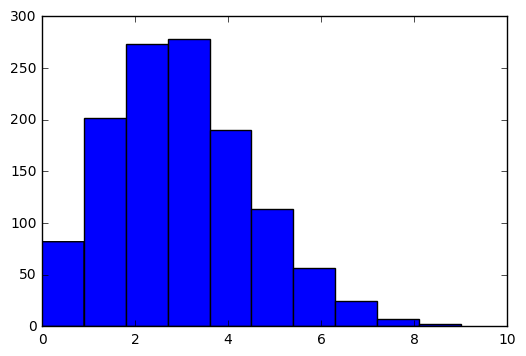

In [169]:
plt.hist(dm['homeGoals'])

Estimate the impact of salary on goals scored: $hgoals_i = \beta_0 + \beta_1 hsalary_i  + \mu_i$

In [170]:
# note, a vector of ones is included for the constant/intercept term

Y = dm['homeGoals']
X = sm.add_constant(dm['homeSalary'])

m1 = sm.OLS(Y, X).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              homeGoals   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.814
Date:                Tue, 14 Feb 2017   Prob (F-statistic):            0.00916
Time:                        09:50:49   Log-Likelihood:                -2401.8
No. Observations:                1230   AIC:                             4808.
Df Residuals:                    1228   BIC:                             4818.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.2615      0.230      9.838      0.000         1.811     2.713
homeSalary     0.0144      0.006      2.610      0.009         0.004     0.025
==============================================================================
Omnibus:                       46.350   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.960
Skew:                           0.498   Prob(JB):                     8.59e-12
Kurtosis:                       3.034   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
temp.params

const        1.966720
lnhsalary    0.789404
lnasalary   -1.263994
dtype: float64

$\beta_0=2.26$ 

$\beta_1=0.014$ 

A one million dollar increase in salary resulting in an increase of 0.014 goals per game

Taken literally the constant represents the number of goals scored per game with a home salary of 0 dollars.

In [172]:
# embed the variables into the equation
temp = sm.OLS(dm['homeGoals'],sm.add_constant(dm['homeSalary'])).fit()
temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              homeGoals   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.814
Date:                Tue, 14 Feb 2017   Prob (F-statistic):            0.00916
Time:                        09:50:49   Log-Likelihood:                -2401.8
No. Observations:                1230   AIC:                             4808.
Df Residuals:                    1228   BIC:                             4818.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.2615      0.230      9.838      0.000         1.811     2.713
homeSalary     0.0144      0.006      2.610      0.009         0.004     0.025
==============================================================================
Omnibus:                       46.350   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.960
Skew:                           0.498   Prob(JB):                     8.59e-12
Kurtosis:                       3.034   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Estimate the impact of salary on goals scored: $hgoals_i = \beta_0 + \beta_1 ln(hsalary_i)  + \mu_i$

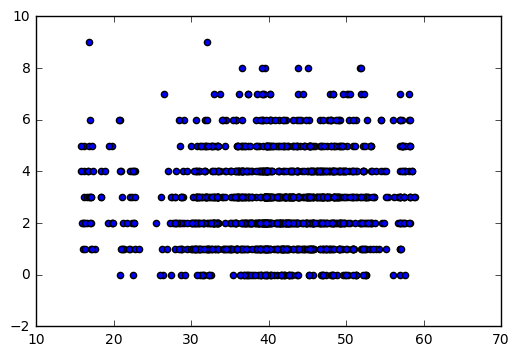

In [173]:
plt.scatter(dm['homeSalary'], dm['homeGoals'])

In [174]:
dm.head()

   gamenumber awayTeam  awaySalary  awayAge  awayHeight  awayWeight  \
0       20001      MTL   38.383301      501        1313        3695   
1       20002      PHI   50.365002      498        1317        3669   
2       20003      CAR   35.825001      471        1315        3574   
3       20004      CHI   50.560001      462        1326        3700   
4       20005      CGY   39.764999      505        1331        3726   

        awayGoaliue  awayGoals homeTeam  homeSalary    ...      ishwin  dAge  \
0       PRICE_CAREY          2      TOR   44.612999    ...           1   -30   
1  BOBROVSKY_SERGEI          3      PIT   49.192402    ...           0    -1   
2          WARD_CAM          4      MIN   40.180000    ...           0    32   
3       TURCO_MARTY          3      COL   33.750000    ...           1     7   
4  KIPRUSOFF_MIIKKA          0      EDM   41.400002    ...           1   -47   

   dHeight dWeight    lnDAge lnDHeight  lnDWeight  lnSalary  lnhsalary  \
0       -1    2402

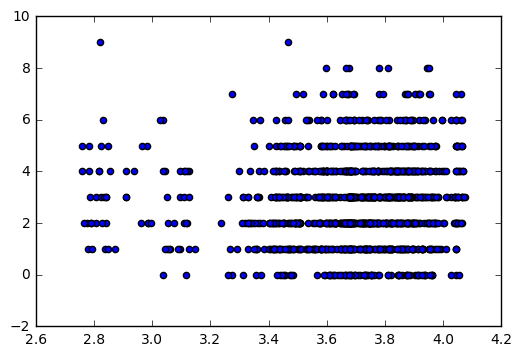

In [175]:
plt.scatter(dm['lnhsalary'], dm['homeGoals'])

In [176]:
temp = sm.OLS(dm['homeGoals'],sm.add_constant(dm['lnhsalary'])).fit()
temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              homeGoals   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.198
Date:                Tue, 14 Feb 2017   Prob (F-statistic):             0.0407
Time:                        09:50:50   Log-Likelihood:                -2403.1
No. Observations:                1230   AIC:                             4810.
Df Residuals:                    1228   BIC:                             4820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.3703      0.723      1.896      0.058        -0.048     2.788
lnhsalary      0.4015      0.196      2.049      0.041         0.017     0.786
==============================================================================
Omnibus:                       46.562   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.238
Skew:                           0.500   Prob(JB):                     7.48e-12
Kurtosis:                       3.026   Cond. No.                         58.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Logs transfrom the data into percent changes

A one percent increase in salary results in an increase of 0.40 goals per game

$$hgoals_i = \beta_0 + \beta_1 lnhsalary_i + \beta_2 lnasalary_i + mu_i$$

In [177]:
temp = sm.OLS(dm['homeGoals'],sm.add_constant(dm[['lnhsalary', 'lnasalary']])).fit()
temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              homeGoals   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.12
Date:                Tue, 14 Feb 2017   Prob (F-statistic):           4.38e-05
Time:                        09:50:50   Log-Likelihood:                -2395.1
No. Observations:                1230   AIC:                             4796.
Df Residuals:                    1227   BIC:                             4812.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.3420      1.034      4.201      0.000         2.314     6.370
lnhsalary      0.3746      0.195      1.922      0.055        -0.008     0.757
lnasalary     -0.7825      0.196     -3.998      0.000        -1.166    -0.399
==============================================================================
Omnibus:                       46.552   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.178
Skew:                           0.499   Prob(JB):                     7.70e-12
Kurtosis:                       3.046   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
dm['ishwin']

0       1
1       0
2       0
3       1
4       1
5       0
6       0
7       1
8       1
9       0
10      1
11      0
       ..
1218    0
1219    1
1220    0
1221    1
1222    0
1223    0
1224    1
1225    1
1226    0
1227    1
1228    0
1229    1
Name: ishwin, dtype: int64

In [179]:
dm['dGoals'].head(20)

0     1
1    -1
2    -1
3     1
4     4
5    -1
6    -1
7     0
8     4
9    -1
10    2
11   -3
12   -3
13    4
14    0
15   -1
16    5
17    2
18    1
19    3
Name: dGoals, dtype: int64

In [180]:
temp = sm.OLS(dm['dGoals'],sm.add_constant(dm[['lnhsalary', 'lnasalary']])).fit()
temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 dGoals   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     15.26
Date:                Tue, 14 Feb 2017   Prob (F-statistic):           2.83e-07
Time:                        09:50:50   Log-Likelihood:                -2810.7
No. Observations:                1230   AIC:                             5627.
Df Residuals:                    1227   BIC:                             5643.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.9667      1.449      1.357      0.175        -0.876     4.810
lnhsalary      0.7894      0.273      2.890      0.004         0.253     1.325
lnasalary     -1.2640      0.274     -4.607      0.000        -1.802    -0.726
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.568
Skew:                           0.037   Prob(JB):                        0.753
Kurtosis:                       3.074   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([  98.,  216.,  295.,  287.,  204.,   77.,   31.,   16.,    3.,    3.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

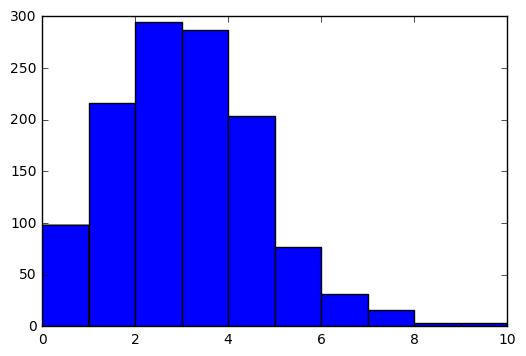

In [181]:
plt.hist(dm['awayGoals'])

(array([   4.,    7.,   45.,  111.,  334.,  149.,  356.,  131.,   71.,   22.]),
 array([-8. , -6.5, -5. , -3.5, -2. , -0.5,  1. ,  2.5,  4. ,  5.5,  7. ]),
 <a list of 10 Patch objects>)

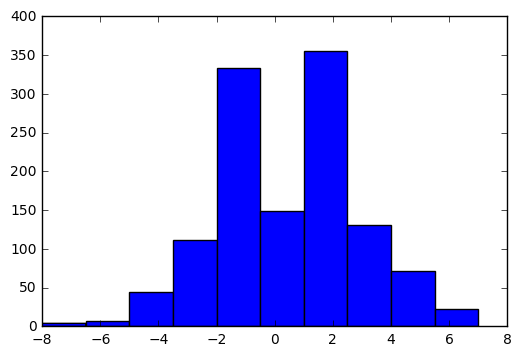

In [182]:
plt.hist(dm['dGoals'])

Examine annualize home team data

In [183]:
Estimate the impact of salary on goals allowed: $hgoals_i = \beta_0 + \beta_1 ln(hsalary_i)  + \mu_i$

SyntaxError: invalid syntax (<ipython-input-183-004bbd3f5da6>, line 1)

In [ ]:
temp = sm.OLS(dm['homeGoals'],sm.add_constant(dm['awaySalary'])).fit()
temp.summary()

# Contest model 

Represent the data relative to a team (e.g. home)

$$hwin_i = \beta_0 + \beta_1 (hsalary_i - asalary_i) + \mu_i $$

In [ ]:
temp = sm.OLS(dm['dGoals'],sm.add_constant(dm['lnSalary'])).fit()
temp.summary()

A one percent increase in the difference in team salaries increases the goal differential by 0.22 goals per game

In [ ]:
temp = sm.OLS(dm['homeWin'],sm.add_constant(dm['lnSalary'])).fit()
temp.summary()

A one percent increase in the difference in team salaries increases the probability of a win by 0.23 points.

The home team advantage is 0.17 probabability points (0.5173 - 0.5000)